In [1]:
pip install matplotlib==3.4.2


In [2]:
import pandas as pd
import numpy as np

import pkg_resources
pkg_resources.require("matplotlib==3.4.2")  
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

print(matplotlib.__version__)

3.4.2


In [14]:
fn_melatonin_baseline = 'Mod_05-Jun-2021_Melatonin-base.csv'
fn_melatonin = 'Mod_08-Jun-2021 Melatonin.csv'
fn_cogrowth = 'Mod_08-Jun-2021 co-grow.csv'
# fn_melatonin_baseline = '/Users/oliviagallup/Downloads/Mod_05-Jun-2021_Melatonin-base.xls'

melatonin_baseline_all = pd.read_csv(fn_melatonin_baseline)
melatonin_knockout_all = pd.read_csv(fn_melatonin)
cogrowth = pd.read_csv(fn_cogrowth)



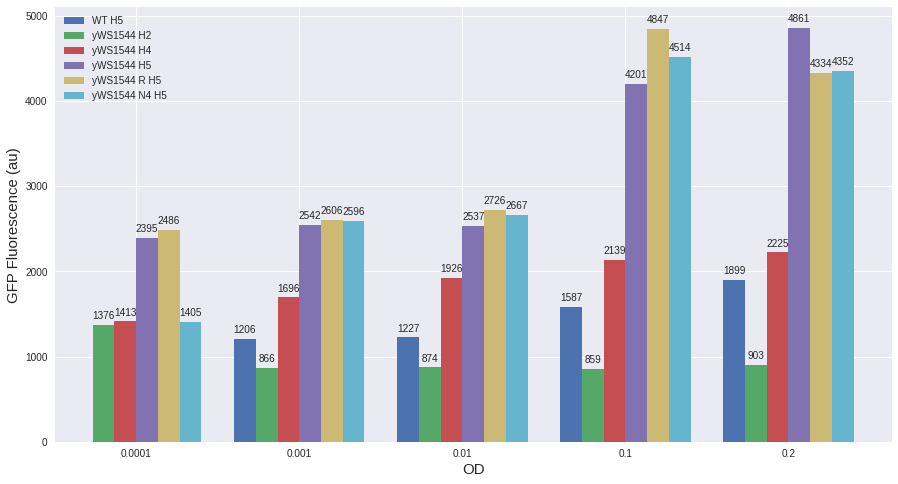

In [7]:
# Plot cogrowth

# plt.plot(xb,yb,'o', x_new, y_new_baseline, xk, yk, 'o', x_new, y_new_knockout)
# plt.plot()
# plt.legend()
# # plt.xlim([x[0]-1, x[-1] + 1 ])
# plt.show()
producers = ['H5', 'H2', 'H4', 'H5', 'H5', 'H5']
sensors = ['WT', 'yWS1544', 'yWS1544', 'yWS1544', 'yWS1544 R', 'yWS1544 N4']

padding = 1.5
width = 1/(len(sensors)+padding)
widths = (np.arange(0, len(sensors))+0.5) * width 
widths = widths - width * len(widths)/2


fig, ax = plt.subplots(figsize=(15,8))
for i, (p, s) in enumerate(zip(producers, sensors)):
    bar_locs = np.arange(len(sensors)-1)
    x = cogrowth.query("Sensor == '{}'".format(s))
    x = x.query("Producer == '{}'".format(p))

    # z = np.log10(x["OD of producer"])[1:] + widths[i]
    y = np.array(x["GFP gated"][::-1])
    
    if s == 'WT':   # leave out wt outlier
        # z = np.log10(x["OD of producer"])[1:-1] + widths[i]
        y = y[1:]
        bar_locs = bar_locs[1:]

    # average first 2 points
    # z.iloc[0] = (z.iloc[0] + z.iloc[1])/2
    # z.drop(z.index[1])
    # y.iloc[0] = (y.iloc[0] + y.iloc[1])/2
    # y.drop(y.index[1])
    barx = ax.bar(bar_locs+widths[i], y, width, label=(s+' '+p))

    plt.bar_label(barx, padding=4)

labels = x["OD of producer"][::-1]
ax.set_xticks(bar_locs)
ax.set_xticklabels(labels)
leg = ax.legend()
plt.xlabel('OD', fontsize=15)
plt.ylabel('GFP Fluorescence (au)', fontsize=15)
plt.savefig('./cogrowth_curves_gated.png')

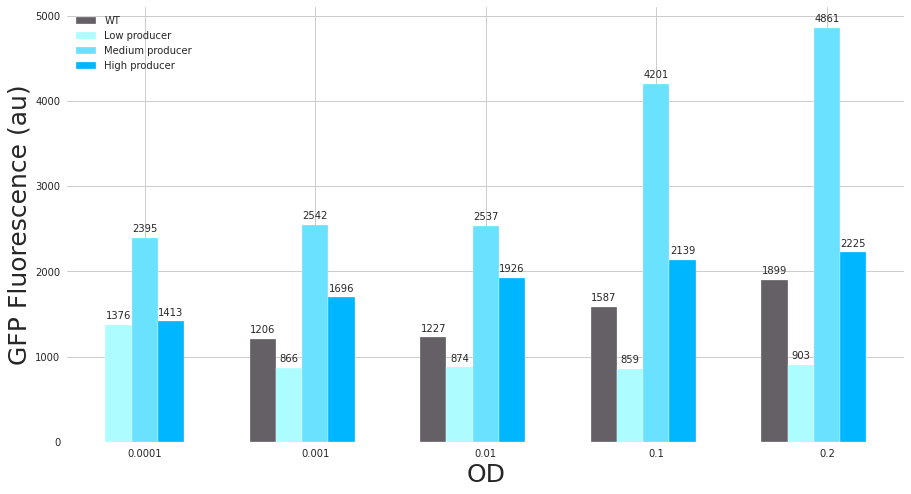

In [38]:
# Plot cogrowth FOR PRESENTATION
sns.set_style("whitegrid")

producers = ['H5', 'H2', 'H5', 'H4']
sensors = ['WT', 'yWS1544', 'yWS1544', 'yWS1544']
# colors = ['#656066', '#b8ffc1', '#6effa3', '#00f26d']
colors = ['#656066', '#adfcff', '#69e1ff', '#00b7ff']
labels = ['WT', 'Low producer', 'Medium producer', 'High producer']
num_ods = 5

padding = 1.5
width = 1/(num_ods+padding)
widths = (np.arange(0, num_ods)+0.5) * width 
widths = widths - width * len(widths)/2


fig, ax = plt.subplots(figsize=(15,8))
for i, (p, s) in enumerate(zip(producers, sensors)):
    bar_locs = np.arange(0, num_ods)
    x = cogrowth.query("Sensor == '{}'".format(s))
    x = x.query("Producer == '{}'".format(p))

    y = np.array(x["GFP gated"][::-1])
    
    if s == 'WT':   # leave out wt outlier
        y = y[1:]
        bar_locs = bar_locs[1:]

    barx = ax.bar(bar_locs+widths[i], y, width, label=labels[i], color=colors[i])
    plt.bar_label(barx, padding=4)

labels = x["OD of producer"][::-1]
ax.set_xticks(bar_locs)
ax.set_xticklabels(labels)
leg = ax.legend()
plt.xlabel('OD', fontsize=25)
plt.ylabel('GFP Fluorescence (au)', fontsize=25)
plt.savefig('./cogrowth_curves_gated_min.png')

In [4]:
Remove controls
melatonin_baseline = melatonin_baseline_all.drop([len(melatonin_baseline_all.index)-1, len(melatonin_baseline_all.index)-2])
melatonin_knockout = melatonin_knockout_all.drop([len(melatonin_knockout_all.index)-1, len(melatonin_knockout_all.index)-2])
# cogrowth = cogrowth.drop([len(cogrowth.index)-1, len(cogrowth.index)-2, len(cogrowth.index)-3])

# Add some fake zeros for curve fitting
# for n in [-10.5,-11]:
#     melatonin_baseline = melatonin_baseline.append({'log[Melatonin]': n, 
#                                                 'Statistic':0}, ignore_index=True)
#     melatonin_knockout = melatonin_knockout.append({'log[Melatonin]': n, 
                                                # 'Statistic':0}, ignore_index=True)
    
# # And some fake tail end data
# stat_baseline = melatonin_baseline['Statistic'][0]
# stat_knockout = melatonin_knockout['Statistic'][0]
# for n in [a+0.5 for a in np.array(range(int(melatonin_baseline['log[Melatonin]'][0])*2, -4))*0.5]:
#     melatonin_baseline = melatonin_baseline.append({'log[Melatonin]': n, 
#                                                 'Statistic':stat_baseline}, ignore_index=True)
#     melatonin_knockout = melatonin_knockout.append({'log[Melatonin]': n, 
#                                                 'Statistic':stat_knockout}, ignore_index=True)

poly_order = 4


NameError: ignored

In [ ]:
# Get baseline curve
# get x and y vectors
xb = melatonin_baseline['log[Melatonin]']
yb = melatonin_baseline['Statistic']

xb = np.array(xb, dtype=np.float32)
xb_log = 10**xb
yb_mod = np.array(yb, dtype=np.float32)

yb_mod[3] = np.average([yb_mod[2], yb_mod[4]])

# calculate polynomial
z = np.polyfit(xb, yb_mod, poly_order)
f_baseline = np.poly1d(z)
z_log = np.polyfit(xb_log, yb_mod, poly_order)
f_baseline_log = np.poly1d(z_log)


In [ ]:
f_baseline

poly1d([4.24950645e+02, 9.50405898e+03, 7.02930517e+04, 2.35668757e+05,
       5.85237731e+05])

In [ ]:
# Get Knockout curve
# get x and y vectors
xk = melatonin_knockout['log[Melatonin]']
yk = melatonin_knockout['Statistic']

xk = np.array(xk, dtype=np.float32)
yk_mod = np.array(yk, dtype=np.float32)

# calculate polynomial
z = np.polyfit(xk, yk_mod, poly_order)
f_knockout = np.poly1d(z)
z = np.polyfit(xb_log, yk_mod, poly_order)
f_knockout_log = np.poly1d(z)

In [ ]:
f_knockout

poly1d([1.21921590e+02, 4.43460975e+03, 4.44190326e+04, 1.70421112e+05,
       4.88808962e+05])

In [ ]:
# Get Ave curve
# get x and y vectors
xa = xb
ya = np.average([yb_mod, yk], axis=0)

# calculate polynomial
poly_order = 4
z = np.polyfit(xa, ya, poly_order)
f_ave = np.poly1d(z)

In [ ]:
f_ave

poly1d([2.73436118e+02, 6.96933436e+03, 5.73560421e+04, 2.03044935e+05,
       5.37023346e+05])

In [ ]:
np.max(xb)

-3.0

In [ ]:
# Fit curve

# calculate new x's and y's
x_new = np.linspace(np.min(xb), np.max(xb), 50)
y_new_baseline = f_baseline(x_new)
y_new_knockout = f_knockout(x_new)
y_new_ave = f_ave(x_new)

cols_melatonin_baseline_fit = ['log[Melatonin] expanded', 'GFP (au) Polynomial order {}'.format(poly_order)]
melatonin_baseline_fit = pd.DataFrame(data=None,
                                      columns=cols_melatonin_baseline_fit)
melatonin_baseline_fit[cols_melatonin_baseline_fit[0]] = x_new
melatonin_baseline_fit[cols_melatonin_baseline_fit[1]] = y_new_baseline

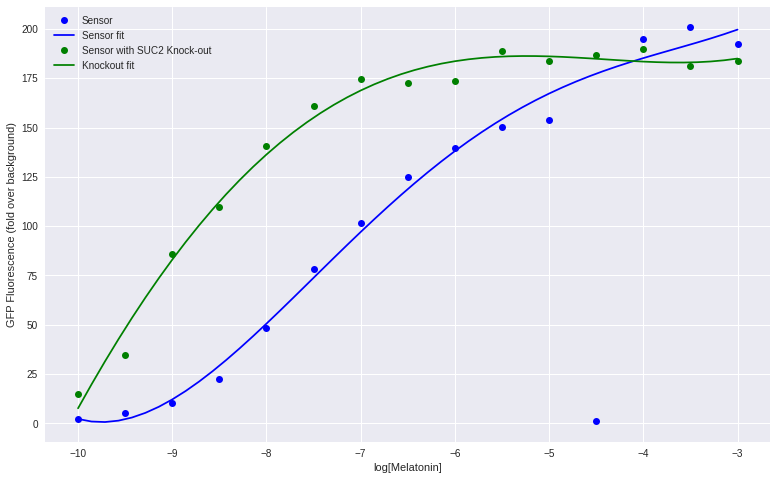

In [ ]:
# Plot plt

# plt.plot(xb,yb,'o', x_new, y_new_baseline, xk, yk, 'o', x_new, y_new_knockout)
# plt.plot()
# plt.legend()
# # plt.xlim([x[0]-1, x[-1] + 1 ])
# plt.show()

background = melatonin_baseline_all['Statistic'].iloc[-1]

fig, ax = plt.subplots(figsize=(13,8))
ax.plot(xb, yb / background, 'ob', label='Sensor')
ax.plot(x_new, y_new_baseline / background, '-b', label='Sensor fit')
ax.plot(xk, yk / background, 'og', label='Sensor with SUC2 Knock-out')
ax.plot(x_new, y_new_knockout / background, '-g', label='Knockout fit')
# ax.plot(xa, ya, 'oy', label='Ave')
# ax.plot(x_new, y_new_ave, '-y', label='Ave Fitted')
leg = ax.legend()
plt.xlabel('log[Melatonin]')
plt.ylabel('GFP Fluorescence (fold over background)')
plt.savefig('./sensor_strain_curve.png')

In [ ]:
background

1446

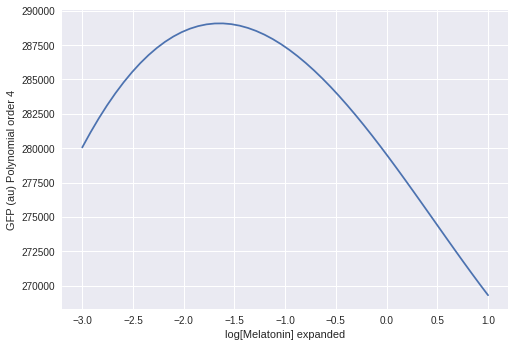

In [ ]:
# Plot Seaborn

# plt.plot(x,y,'o', x_new, y_new)
sns.lineplot(data=melatonin_baseline_fit, x=cols_melatonin_baseline_fit[0], y=cols_melatonin_baseline_fit[1],
             palette=sns.color_palette("mako_r", 6), legend="full")
# plt.xlim([x[0]-1, x[-1] + 1 ])
# plt.show()

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/gdrive")